In [1]:
# 주피터 내에 있는 폰드 확인, 저장된 폰트목록 리스트화

import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\BRLNSR.TTF',
 'C:\\Windows\\Fonts\\Sitka.ttc',
 'C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\Windows\\Fonts\\HATTEN.TTF',
 'C:\\Windows\\Fonts\\mingliub.ttc',
 'C:\\Windows\\Fonts\\ROCKB.TTF',
 'C:\\Windows\\Fonts\\BAUHS93.TTF',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\Candarab.ttf',
 'C:\\Windows\\Fonts\\FRADMCN.TTF',
 'C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\FRADMIT.TTF',
 'C:\\Windows\\Fonts\\TCBI____.TTF',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\GOTHICB.TTF',
 'C:\\Windows\\Fonts\\PERTILI.TTF',
 'C:\\Windows\\Fonts\\ROCKI.TTF',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\ARLRDBD.TTF',
 'C:\\Windows\\Fonts\\Candarai.ttf',
 'C:\\Windows\\Fonts\\cambriab.ttf',
 'C:\\Windows\\Fonts\\LBRITED.TTF',
 'C:\\Windows\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\seguibl.ttf',
 'C:\\Windows\\Fonts\\LEELA

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

#matplotlib의 글자가 꺠지지 않게 하기 위해 matplotlib의 폰트를 바꾸어줌
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
rc('font', family=font_name)
flist = matplotlib.font_manager.get_fontconfig_fonts()

import sys
import csv
import pandas as pd

#csv.field_size_limit(100000000)
data = pd.read_csv('processed_2002.csv', encoding='utf8', engine='python')
data_d = pd.read_csv('processed_2002.csv', encoding='utf8', engine='python').dropna(subset=['pos']) # non drop이랑 개수 같음

In [6]:
print(data)

                                                  article     date press  \
0       \r\n\r\n\r\n\r\n\r\n     시인 배용제씨. [연합뉴스]   여고생...  2018.06  중앙일보   
1       \r\n\r\n\r\n\r\n\r\n     안희정 전 충남지사(왼쪽)과 기사내용과...  2018.06  중앙일보   
2       \r\n\r\n\r\n\r\n\r\n ━  ‘최저 3.3조원’ 5G 주파수, 오늘 ...  2018.06  중앙일보   
3       \r\n\r\n\r\n\r\n\r\n     미국 CNN은 13일(현지시간) 로스앤...  2018.06  중앙일보   
4       \r\n\r\n\r\n\r\n\r\n     [사진 SBS '그것이 알고 싶다'] ...  2018.06  중앙일보   
...                                                   ...      ...   ...   
106169  \r\n   직장내 연하 남성을 성희롱한 여직원과 이를 방조한 회사에 책임을 묻는\...  2002.05  매일경제   
106170  \r\n   지난해 우리나라  여성취업자는 총 882만명에 달했으며 여성가장 실업자...  2002.05  매일경제   
106171  \r\n   직장 내 성희롱을 진정한 계약직 공무원이 채용기간연장을 거부당하자\r\...  2002.04  매일경제   
106172     직장내 성희롱 상담 건수가 해마다 늘고 있는 것으로 나타났다.\r\n\r\n\...  2002.04  매일경제   
106173     평생 골프에 빠져 아내와 함께 주말을 보낸 적이 거의 없는 한 남자가\r\n\...  2002.02  매일경제   

                                          title  \
0               '여고생 제자 성폭행·추행' 배용제 

In [8]:
data.press = data.press.astype('category')
pd.DataFrame(data.press.value_counts())
pd.DataFrame(data.press.value_counts()).transpose() # 세로 to 가로

,KBS,SBS,경향신문,중앙일보,MBC,매일경제,동아일보,조선일보,한겨레,한국경제
press,25187,14408,13938,11443,10983,8732,7953,5826,4929,2775


## Pre-Processing 

Korean NLP Pre-processing package [KoNLPy](http://konlpy.org/en/v0.4.4/) and [코모란 형태소 분석기](https://github.com/shin285/KOMORAN)are used for extract POS.

This work also include removing [stopwords] as well. 


In [13]:
from konlpy.tag import Komoran
pos_tagger = Komoran()
print(data.article[10000].split(r'.')[1])

　18일 대구 소재 모 육군 부대에 따르면 분대장 이모(20) 상병은 지난해 7월부터 올 1월까지 같은 내무반에서 생활하는 A이병(20) 등 후임병 14명을 성추행했다


In [14]:
' '.join(['/'.join(i) for i in pos_tagger.pos(data.article[15000].split(r'.')[50])])

'\u3000/SO 18/SN 일/NNB 대구/NNP 소재/NNG 모/MM 육군/NNP 부대/NNG 에/JKB 따르/VV 면/EC 분대장/NNG 이모/NNP (/SS 20/SN )/SS 상병/NNG 은/JX 지난해/NNG 7월/NNP 부터/JX 올/MM 1월/NNP 까지/JX 같/VA 은/ETM 내무반/NNG 에서/JKB 생활/NNG 하/XSV 는/ETM A/SL 이병/NNP (/SS 20/SN )/SS 등/NNB 후임/NNG 병/NNG 14/SN 명/NNB 을/JKO 성추행/NNG 하/XSV 았/EP 다/EC'

In [17]:
from konlpy.tag import Komoran
import re

pos_tagger = Komoran()

def pos(doc): 
    
    stopwords = ['기자', '대한', '위해', '이후', '이나', '에서', '로부터', '면서', 
             '상대로', '하자', '중이', '로서', '대로', '이기', '구독',
            '구독','글방', '한수진', '사회자', '무단', '전재', '복제',
             '콘텐츠', '허브', '배포', '저작권', '베스트', '추천', '포토', '연합뉴스',
             '래빗', '뉴스래빗', '기사', '중앙',  '한경', '한경닷컴', '한겨레', '경향',
             '동아', '동아일보', '조선', '조선일보', '중앙일보', '매일경제', '매일',
             '뉴스', '앵커', '있다', '있는', '하는', 
             '입니', '있었', '아니', '없다', '이런', '않았', '하지', '하기', '하게', 
             '하다', '이어', '하려', '관한', '있어', '이를', '않고', '않은', 
             '어떤', '많은', '하며', '어떻', '있지', '있던', '아닌', '있으', '있고', 
             '있도', '하거', '하던', '하도', '그러', '겁니', '보여', '있거',
             '것으로', '통해', '것은', '그런', '가운데', '등의', '등에', '따라',
             '것을', '것이', '것은', '위한']
    doc = re.sub('|'.join(stopwords), '', doc)
    return ['/'.join(t) for t in pos_tagger.pos(doc) 
            if re.search('NNG|NNP|VV|VA|MM', t[1]) != None and re.search('[0-9A-Za-z]', t[0]) == None] 

In [ ]:
# 정규화
def preprocess(text):
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', ' ', str(text).strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text


# 명사/영단어 추출, 한글자 제외, 불용어 제거
def final(text):
    n = []
    word = komoran.nouns(text)
    p = komoran.pos(text)
    for pos in p:
      if pos[1] in ['SL']:
        word.append(pos[0])
    for w in word:
      if len(w)>1 and w not in stopwords:
        n.append(w)
    return " ".join(n)

# 최종
def finalpreprocess(text):
  return final(preprocess(text))

In [27]:
' '.join(pos(data.article[15000].split(r'.')[1]))

'연희/NNP 단거리/NNG 패/NNG 활동/NNG 배우/NNP 오동/NNG 자신/NNG 페이스북/NNP 스승/NNG 고발/NNG 글/NNG 올리/VV'

위에서 전처리 한 뒤 corpus에서 빈도상 많은 단어 50 건 아래로 뽑아냄

In [28]:
import nltk
from nltk import FreqDist

tokens = [j for i in data['pos'] for j in i.split(' ')]
text = nltk.Text(tokens)
freq = FreqDist(text)
# sorted(freq.items(), key=lambda item: item[1], reverse=True)

In [29]:
print(text)

<Text: 시인 배 여고생 제자 수차례 성폭행 성희롱 혐의...>


<Figure size 432x288 with 0 Axes>

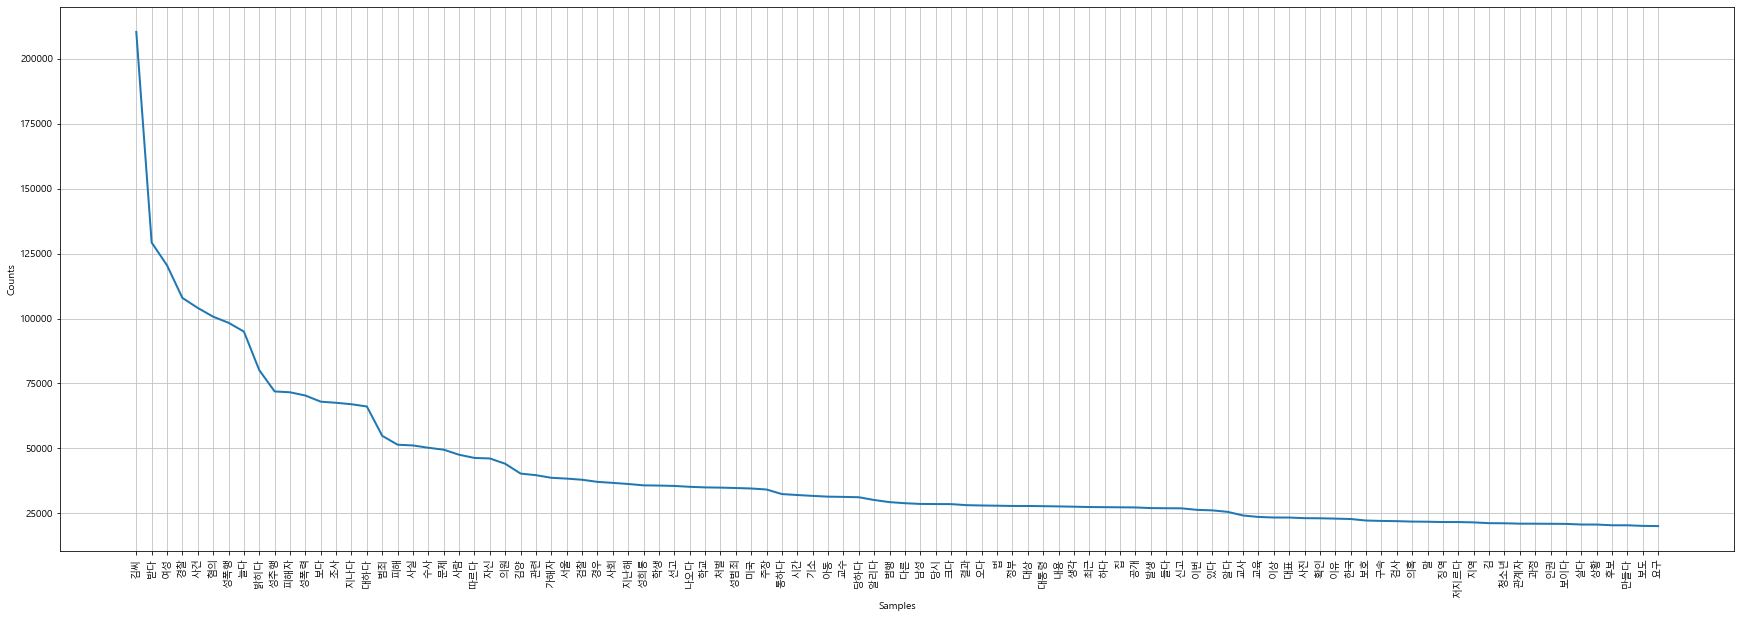

In [8]:
"""
앞에서 세팅함

from matplotlib import font_manager, rc 
font_fname = 'c:/windows/fonts/malgun.ttf' # A font of your choice 
font_name = font_manager.FontProperties(fname=font_fname).get_name() 
rc('font', family=font_name)

"""

import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(30, 10)) 
text.plot(100)

In [33]:
from nltk.probability import FreqDist
freq = FreqDist([j for i in data.article for j in i.split(' ')])

fdic = {i[0]:i[1] for i in freq.most_common(2000)}

pd.DataFrame.from_dict(fdic, orient='index').to_csv('0830_freq.csv', encoding='utf-8')
pd.DataFrame.from_dict(fdic, orient='index').to_excel('0831_freq.xlsx', encoding='utf-8')



In [31]:
print(fdic)

{'': 662157, '김모씨': 201408, '한': 107670, '수': 99795, '등': 96162, '이': 84323, '있는': 76386, '것으로': 71147, '대한': 67745, '는': 64612, '있다.': 64085, '지난': 56958, '전': 56619, '혐의로': 48522, '대해': 46492, '또': 40292, '뒤': 39445, '성폭력': 36724, '그': 35956, '김모양': 34322, '위해': 33929, '\xa0': 33204, '등을': 31992, '같은': 31327, '의': 30552, '지난해': 30474, '가': 30340, '하는': 30214, '여성': 29735, '받고': 29659, '통해': 28312, '성폭행': 27714, '것은': 27595, '함께': 27103, ':': 27050, '중': 26781, '다른': 26708, '더': 26435, '할': 26246, '를': 26227, '이런': 26115, '있습니다.': 26012, '경찰은': 25719, '했다.': 25238, '밝혔다.': 25035, '피해': 24866, '성추행': 24791, '자신의': 23536, '혐의를': 23465, '말했다.': 23168, '서울': 22983, '안': 22351, '때': 22072, '당시': 21757, '및': 21549, '따르면': 21089, '때문에': 20608, '사건': 19960, '것을': 19922, '경찰에': 19678, '두': 19639, '성폭행한': 19571, '없는': 19429, '최근': 19357, '그는': 19187, '징역': 19133, '것': 18516, '게': 18250, '위한': 18106, '것이': 18094, '하지만': 18005, '이후': 17974, '하고': 17940, '모두': 17856, '경우': 17522, '미국': 17154, '따라'

## Analysis

### Structural Topic Model

In the case of STM, it is recommended to refer to the following code(https://github.com/hyejin-jeon-soc/framing_victims_SK/blob/main/stm_HJ.R) as R provides more suitable packages than Python for STM.



## Word Embedding



\begin{align}
\vec{King} + \vec{Woman} - \vec{Man} & = \vec{Queen}
\end{align}

![kingqueen](https://cdn-images-1.medium.com/max/638/1*Bjtqi5sgc-pE8bB80IAkeA.jpeg)


\begin{align}
\vec{김씨} + \vec{여성} - \vec{남성} & = \vec{여성김씨}
\end{align}


In [7]:
# 참조_ https://wikidocs.net/50739

"""
Word2Vec의 하이퍼파라미터값은 다음과 같다.
** sentences = fdic는 cell-18의 토크나이제이션 결과

vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.

"""

from gensim.models.word2vec import Word2Vec
#from gensim.models import KeyedVectors

model = Word2Vec(sentences = fdic, vector_size=100, window=5, min_count=5, workers=4, sg=0)
s_model = Word2Vec.load('standard.model') # 뭔지몰라 창동 확인 필

NameError: name 'fdic' is not defined

In [21]:
s_model.wv.most_similar(['김씨', '피해자'], ['가해자'], topn=30)

[('여직원', 0.24676966667175293),
 ('김양', 0.242122620344162),
 ('피해', 0.23500217497348785),
 ('이듬해', 0.22837093472480774),
 ('시각장애인', 0.22762863337993622),
 ('중순', 0.22371426224708557),
 ('시아버지', 0.22361138463020325),
 ('지난해', 0.22172030806541443),
 ('판시', 0.21762427687644958),
 ('커피숍', 0.2118055820465088),
 ('원고', 0.21037393808364868),
 ('공단', 0.20983736217021942),
 ('보조원', 0.20747822523117065),
 ('아내', 0.20677946507930756),
 ('지망', 0.20254701375961304),
 ('딸', 0.2017091065645218),
 ('돌려받다', 0.20169484615325928),
 ('처제', 0.20152749121189117),
 ('명목', 0.20145145058631897),
 ('수원지법', 0.19999027252197266),
 ('무효', 0.19846412539482117),
 ('행정소송', 0.19815212488174438),
 ('수강', 0.1979256421327591),
 ('불복', 0.1971675306558609),
 ('가자', 0.19604088366031647),
 ('수차례', 0.19368454813957214),
 ('이튿날', 0.18953277170658112),
 ('춘천', 0.18903081119060516),
 ('마사지', 0.18889668583869934),
 ('쓰다듬다', 0.1883142739534378)]

In [23]:
df = pd.DataFrame()
df['여자'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('여자', topn=30)][0:30]
df['여성'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('여성', topn=30)][0:30]
df['김양'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('김양', topn=30)][0:30]
df['남자'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('남자', topn=30)][0:30]
df['남성'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('남성', topn=30)][0:30]
df['김군'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('김군', topn=30)][0:30]
df['피해자'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('피해자', topn=30)][0:30]
df['가해자'] = [(i[0], round(i[1], 2)) for i in s_model.wv.most_similar('가해자', topn=30)][0:30]
df

,여자,여성,김양,남자,남성,김군,피해자,가해자
0,"(여자애, 0.53)","(여대생, 0.37)","(김군, 0.5)","(여자애, 0.5)","(남자, 0.44)","(김양, 0.5)","(피해, 0.41)","(범인, 0.5)"
1,"(남자, 0.5)","(남성, 0.35)","(동생, 0.39)","(여자, 0.5)","(여성, 0.35)","(동급생, 0.43)","(신고자, 0.34)","(혐의자, 0.45)"
2,"(여자아이, 0.45)","(여직원, 0.31)","(큰딸, 0.37)","(처녀, 0.46)","(치한, 0.33)","(고교생, 0.39)","(당사자, 0.32)","(관련자, 0.36)"
3,"(나쁜, 0.39)","(여군, 0.31)","(이혜진, 0.37)","(남성, 0.44)","(남학생, 0.3)","(중퇴, 0.38)","(희생자, 0.31)","(당사자, 0.34)"
4,"(처녀, 0.33)","(여아, 0.29)","(여동생, 0.36)","(창녀, 0.39)","(훔쳐보다, 0.3)","(중학생, 0.38)","(금전, 0.28)","(가해, 0.33)"
5,"(그러다, 0.33)","(여경, 0.28)","(학년, 0.35)","(여주인공, 0.38)","(타자, 0.29)","(여중생, 0.36)","(가해자, 0.27)","(행위자, 0.33)"
6,"(아가씨, 0.33)","(여학생, 0.28)","(여중생, 0.35)","(예쁘다, 0.37)","(가부장제, 0.29)","(담임교사, 0.36)","(사업주, 0.27)","(가하다, 0.31)"
7,"(놀리다, 0.33)","(여자아이, 0.28)","(여고생, 0.34)","(넌, 0.37)","(투숙객, 0.29)","(남학생, 0.34)","(고소인, 0.26)","(공범, 0.3)"
8,"(여주인공, 0.32)","(주부, 0.27)","(딸아이, 0.34)","(여인, 0.36)","(중년, 0.29)","(고등학생, 0.34)","(\n, 0.25)","(신고자, 0.29)"
9,"(멋지다, 0.32)","(인종차별, 0.27)","(의정부시, 0.34)","(아저씨, 0.36)","(영국인, 0.28)","(옥상, 0.34)","(참고인, 0.25)","(죄인, 0.28)"


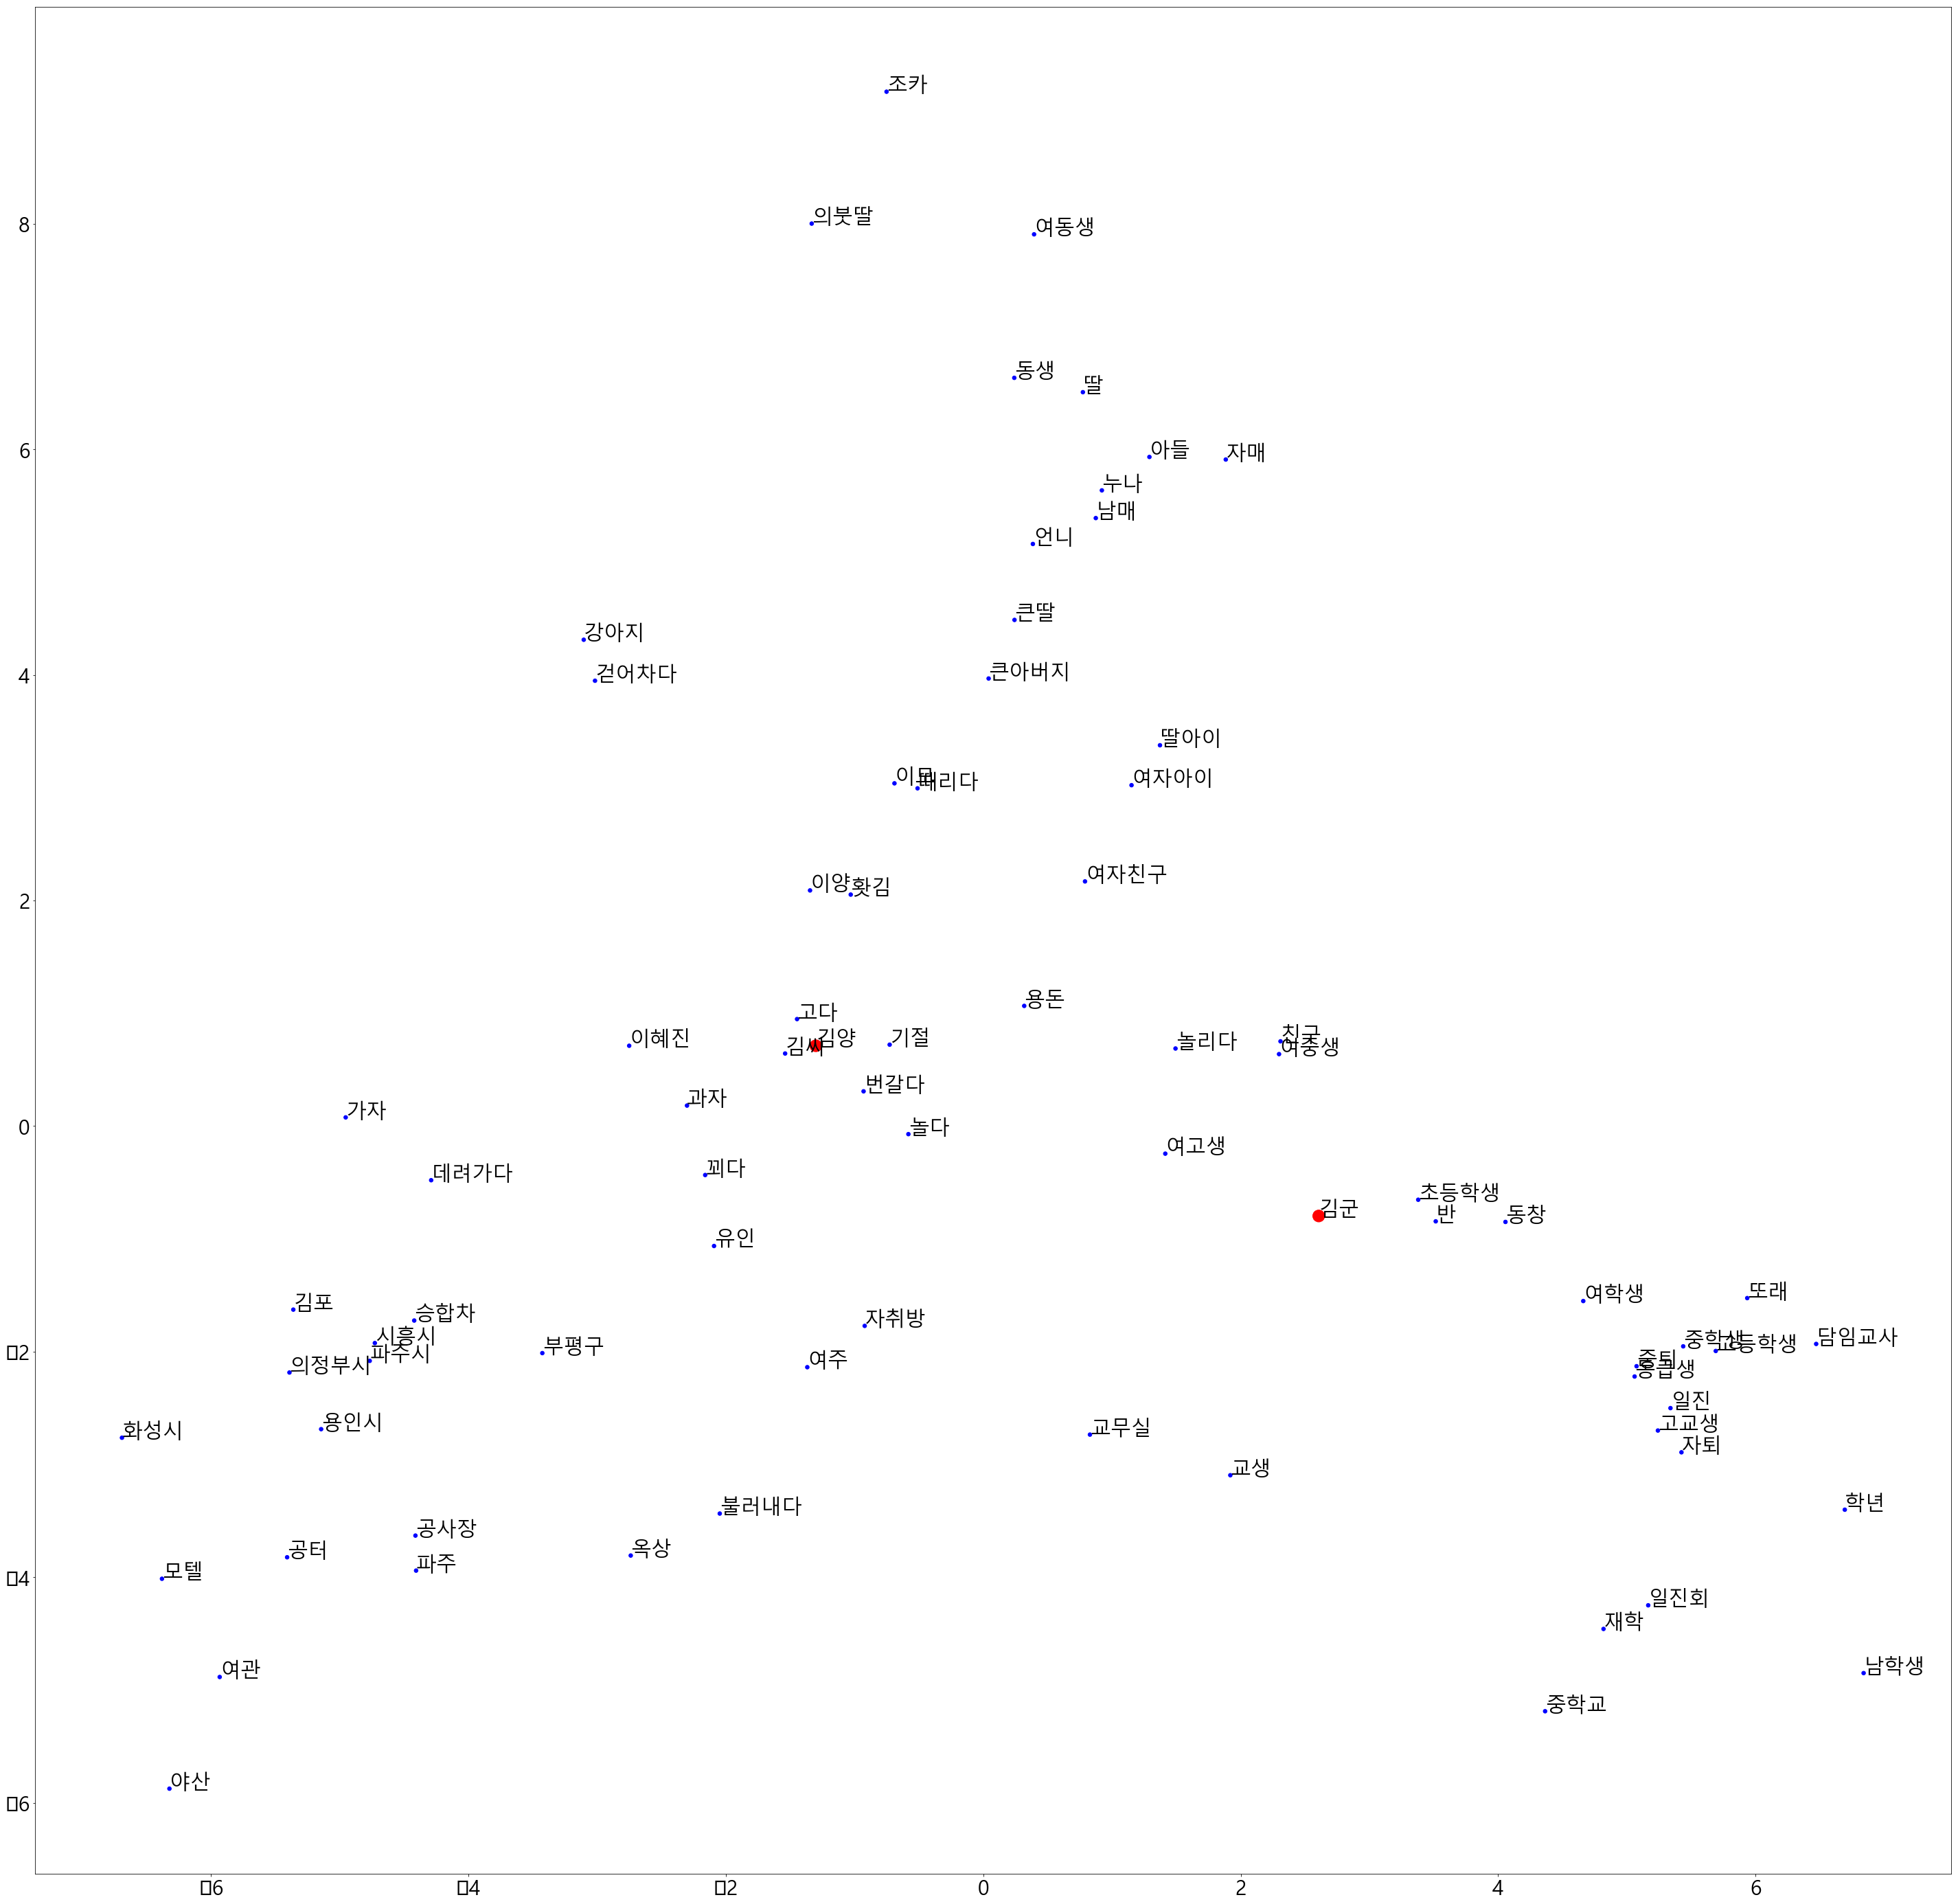

In [146]:
seed = ['김군', '김양']
words = list(set([j[0] for i in seed for j in model.most_similar(i, topn=50)]))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(50,50))
plt.scatter(xs,ys, s=s, c=c)
rc('font',family=font_name, size=30)
for k, v, s in zip(xs,ys,words):
    plt.text(k,v,s)

C:\Users\Hyejin\AppData\Local\Temp/ipykernel_3188/2448457188.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  wordvecs = [s_model.wv.word_vec(i) for i in words]


ModuleNotFoundError: No module named 'adjustText'

C:\Users\Hyejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


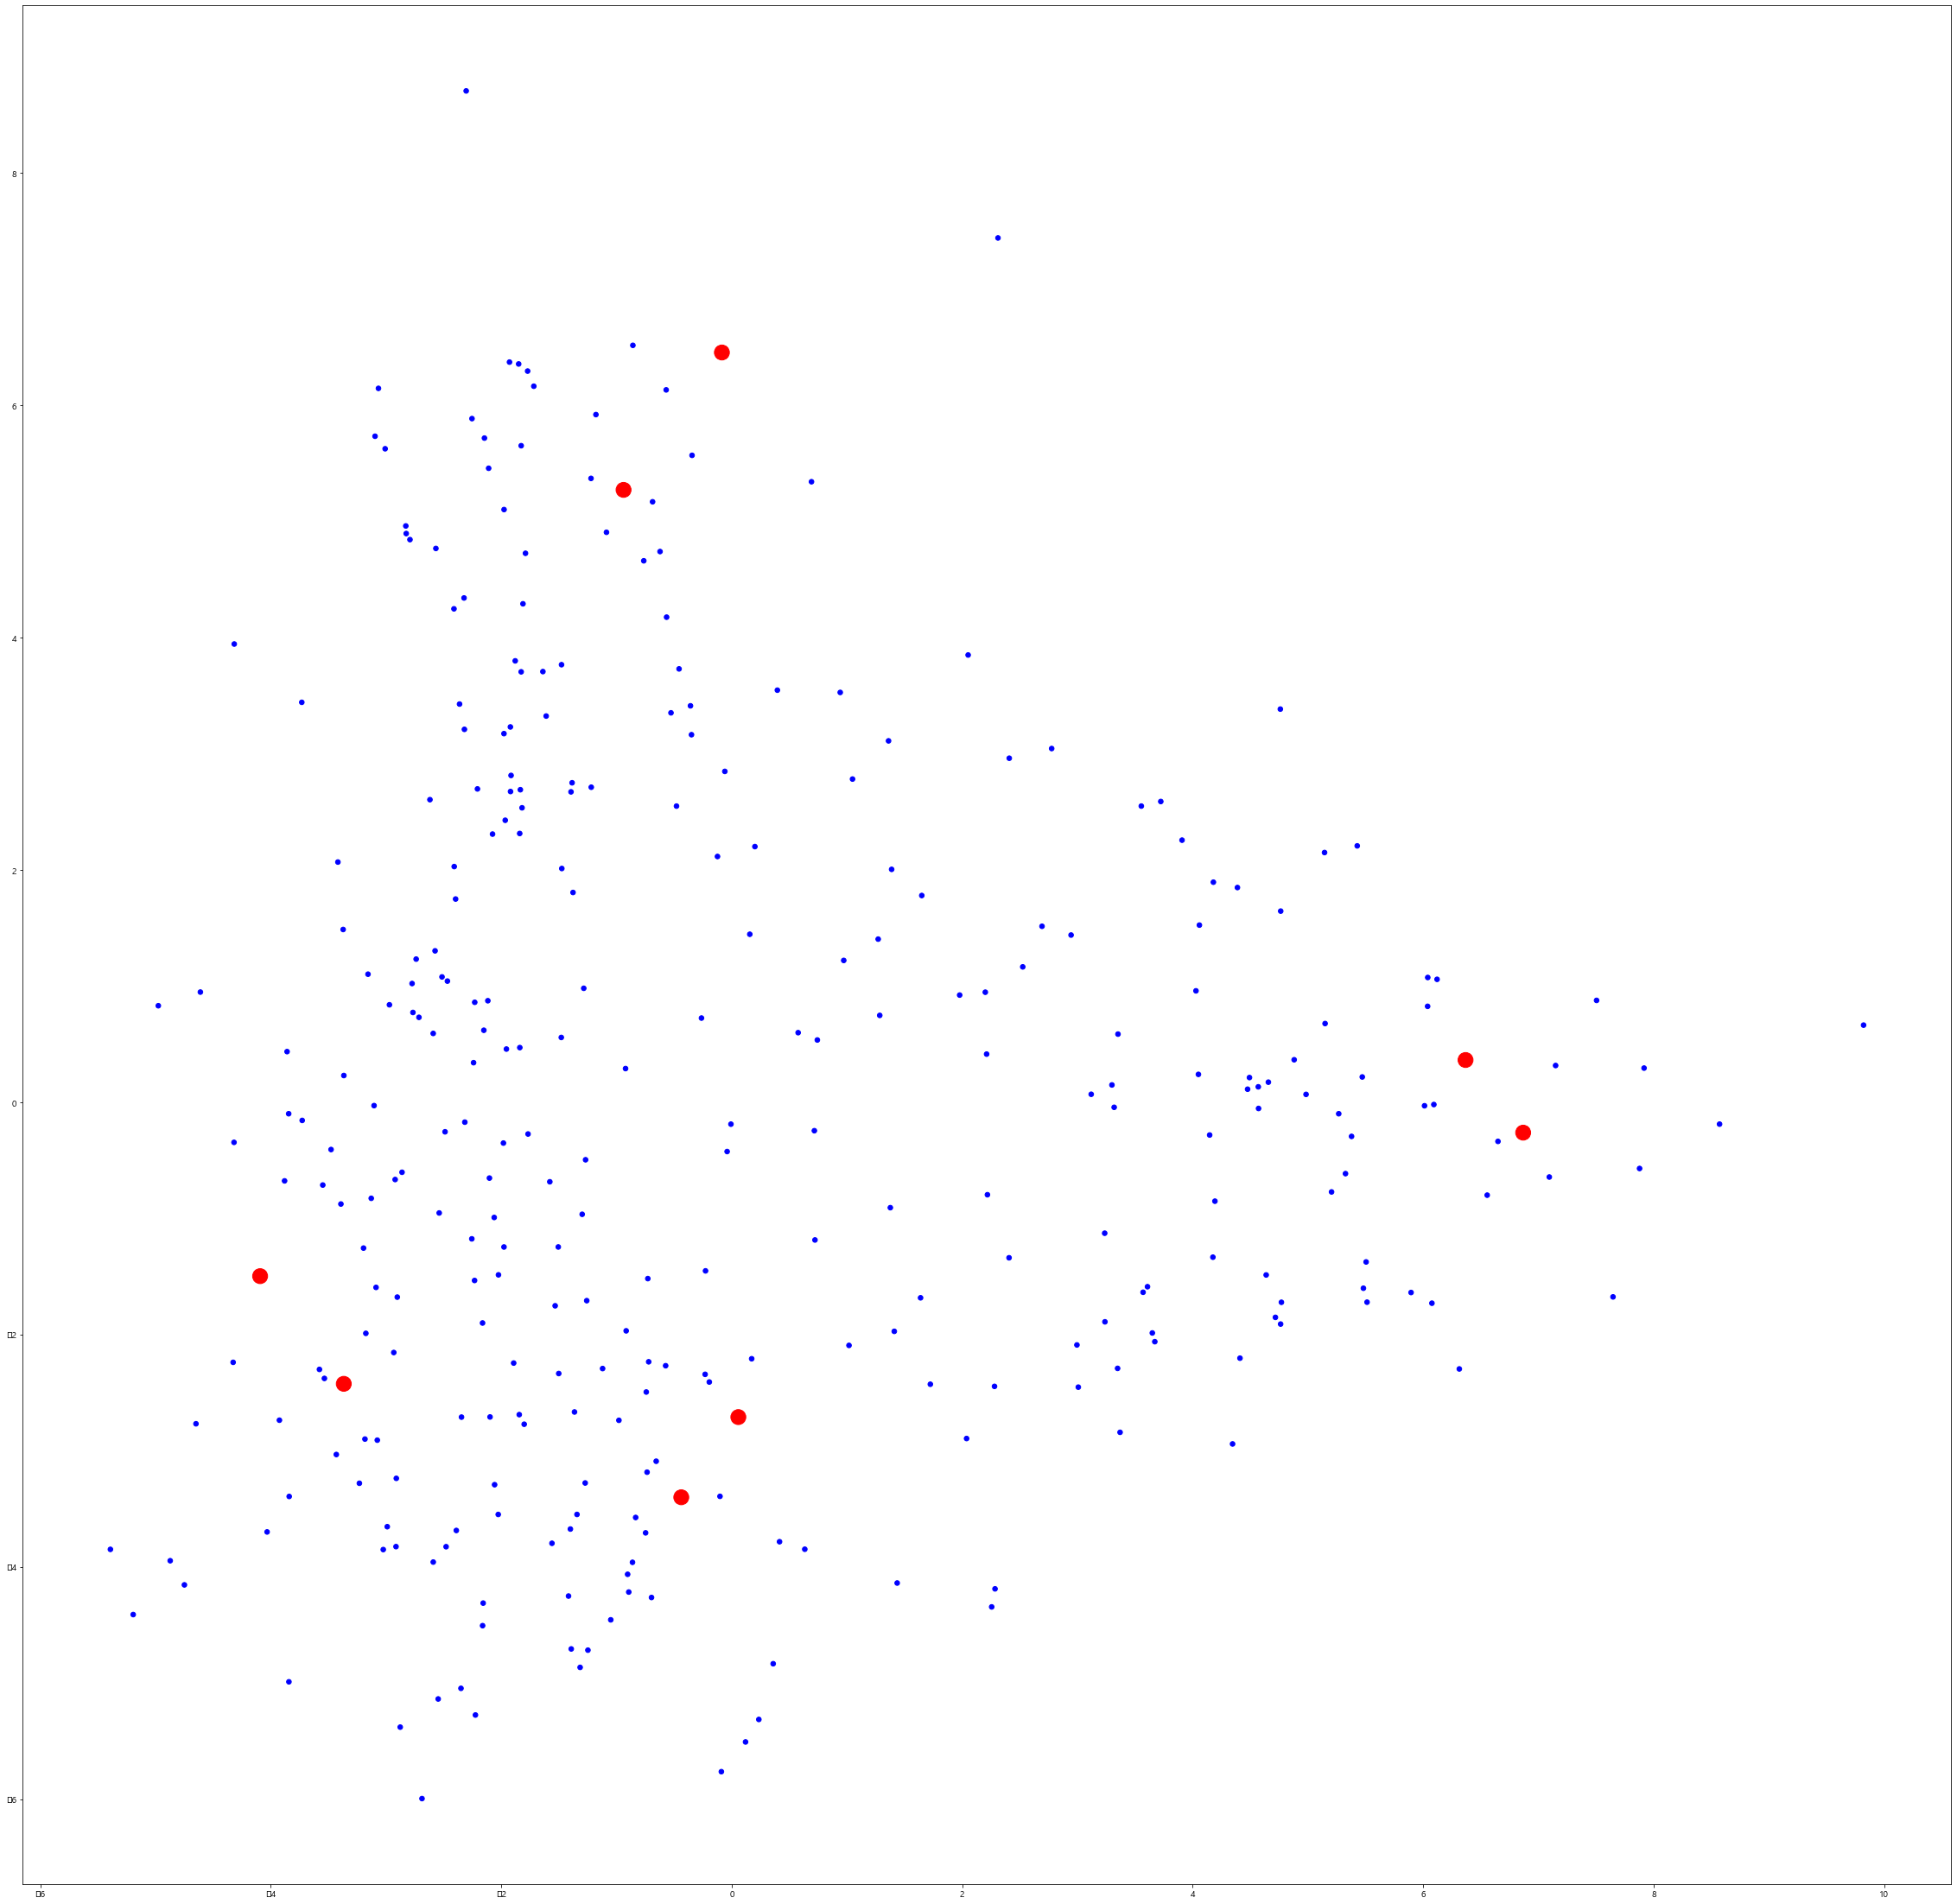

In [24]:
seed = ['김군', '김양', '여자', '여성', '남자', '남성', '피해자', '가해자']
words = list(set([j[0] for i in seed for j in s_model.wv.most_similar(i, topn=50)] + seed))
windex = [words.index(i) for i in seed]
s = [30] * len(words)
c = ['blue'] * len(words)
for i in windex:
    s[i] = 300
    c[i] = 'red'
wordvecs = [s_model.wv.word_vec(i) for i in words]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wordvecs)
X = pca.transform(wordvecs)
xs = X[:, 0]
ys = X[:, 1]
plt.figure(figsize=(40,40))
plt.scatter(xs,ys, s=s, c=c)

from adjustText import adjust_text
rc('font',family=font_name, size=20)
texts = [plt.text(k, v, s) for k, v, s in zip(xs,ys,words)]
adjust_text(texts)
plt.savefig('0830_landscape.jpeg')

In [89]:
df = pd.DataFrame()
df['여성'] = [i[0] for i in model.most_similar(['김씨', '여성'], ['남성'], topn=30)]
df['여성 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '여성'], ['남성'], topn=30)]
df['남성'] = [i[0] for i in model.most_similar(['김씨', '남성'], ['여성'], topn=30)]
df['남성 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '남성'], ['여성'], topn=30)]
df['여자'] = [i[0] for i in model.most_similar(['김씨', '여자'], ['남자'], topn=30)]
df['여자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '여자'], ['남자'], topn=30)]
df['남자'] = [i[0] for i in model.most_similar(['김씨', '남자'], ['여자'], topn=30)]
df['남자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '남자'], ['여자'], topn=30)]
df
df['피해자'] = [i[0] for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)]
df['피해자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '피해자'], ['가해자'], topn=30)]
df['가해자'] = [i[0] for i in model.most_similar(['김씨', '가해자'], ['피해자'], topn=30)]
df['가해자 유사도'] = [round(i[1], 2) for i in model.most_similar(['김씨', '가해자'], ['피해자'], topn=30)]
df

,여성,여성 유사도,남성,남성 유사도,여자,여자 유사도,남자,남자 유사도,피해자,피해자 유사도,가해자,가해자 유사도
0,여직원,0.33,김군,0.26,김양,0.35,동료,0.32,김양,0.29,범인,0.38
1,김양,0.30,남자,0.26,여직원,0.30,남자친구,0.29,노래방,0.25,경찰,0.28
2,여,0.29,시경,0.26,오후,0.27,혐의,0.28,피해,0.23,현행범,0.28
3,사무실,0.28,훔쳐보다,0.23,시키다,0.26,모,0.27,시아버지,0.23,잠복,0.27
4,여대생,0.28,현행범,0.23,의정부시,0.26,내연,0.27,여자친구,0.21,압송,0.27
5,여주인,0.26,모씨,0.23,월초,0.25,유부남,0.26,입원,0.21,혐의,0.26
6,박모,0.26,뒤쫓다,0.23,직원,0.25,지인,0.26,무효,0.20,주범,0.26
7,수련원,0.25,승객,0.23,수차례,0.24,남성,0.26,수차례,0.20,따돌리다,0.26
8,노래방,0.24,쓰다듬다,0.23,김군,0.24,남편,0.26,정준영,0.20,회사원,0.25
9,재직,0.24,찜질방,0.22,사무장,0.24,노래방,0.25,여종업원,0.20,은신,0.24


In [73]:
df = pd.DataFrame()
pd.set_option('display.max_rows', 100)

df['피해자+캠퍼스-술집'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['피해자', '캠퍼스'], ['술집'], topn=100)
                   if i[0] not in ['서강대', '의과대학', '공대']][0:20]
df['피해자+술집-캠퍼스'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['피해자', '술집'], ['캠퍼스'], topn=100)
                   if i[0] not in ['술집', '식당', '주점', '노래방', '음식점', '유흥주점', '모텔']][0:20]
df['여자+학내-술집'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['여자', '학내'], ['술집'], topn=100)
                   if i[0] not in ['고려대학교', '고려대', '서울대학교', '부산대']][0:20]
df['여자+술집-학내'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['여자', '술집'], ['학내'], topn=100)
                   if i[0] not in ['나이트클럽', '커피숍', '식당', '유흥주점', '노래방', '다방', '편의점', '목욕탕', '음식점',
                                  '찜질방', '수영장', '모텔', '주점', '사우나', '레스토랑', '룸살롱', '부평구']][0:20]
df

,피해자+캠퍼스-술집,피해자+술집-캠퍼스,여자+학내-술집,여자+술집-학내
0,"(학내, 0.35)","(피해, 0.29)","(총학생회, 0.27)","(남자, 0.39)"
1,"(희생자, 0.28)","(피고인, 0.28)","(여학생, 0.27)","(접대부, 0.39)"
2,"(상담소, 0.26)","(여주인, 0.27)","(공론, 0.25)","(아가씨, 0.37)"
3,"(종식, 0.24)","(당사자, 0.26)","(여자아이, 0.24)","(마담, 0.36)"
4,"(총학생회, 0.24)","(일행, 0.26)","(학칙, 0.24)","(여자애, 0.34)"
5,"(대책위, 0.22)","(증인, 0.25)","(교내, 0.24)","(합석, 0.34)"
6,"(영이, 0.22)","(술값, 0.24)","(사내, 0.24)","(요새, 0.34)"
7,"(아동, 0.22)","(고소인, 0.24)","(운동선수, 0.23)","(술취, 0.33)"
8,"(핫라인, 0.22)","(참고인, 0.24)","(재학생, 0.23)","(술값, 0.33)"
9,"(예방, 0.22)","(목격자, 0.24)","(학생회, 0.23)","(일행, 0.33)"


In [117]:
df = pd.DataFrame()
df['상처+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['상처', '피해자'], ['가해자'], topn=50)]
df['우울증+피해자-가해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['우울증', '피해자'], ['가해자'], topn=50)]
df['상처+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['상처', '가해자'], ['피해자'], topn=50)]
df['정신병+가해자-피해자'] = [(i[0], round(i[1], 2)) for i in model.most_similar(['정신병', '가해자'], ['피해자'], topn=50)]
df

,상처+피해자-가해자,우울증+피해자-가해자,상처+가해자-피해자,정신병+가해자-피해자
0,"(고통, 0.37)","(정신질환, 0.43)","(범인, 0.31)","(정신질환, 0.37)"
1,"(아픔, 0.34)","(증상, 0.42)","(중상, 0.3)","(범인, 0.37)"
2,"(피해, 0.33)","(불면증, 0.42)","(트라우마, 0.28)","(증후군, 0.35)"
3,"(트라우마, 0.33)","(우울, 0.4)","(주범, 0.27)","(환각, 0.34)"
4,"(희생자, 0.3)","(만성, 0.39)","(고통, 0.26)","(주범, 0.33)"
5,"(정신적, 0.29)","(후유증, 0.37)","(죄인, 0.26)","(소아기호증, 0.32)"
6,"(아프다, 0.29)","(증세, 0.35)","(아픔, 0.25)","(유영철, 0.31)"
7,"(위로, 0.29)","(질환, 0.35)","(충격, 0.25)","(마취제, 0.31)"
8,"(타격, 0.28)","(산업재해, 0.35)","(원한, 0.24)","(사이코패스, 0.3)"
9,"(손해, 0.28)","(증후군, 0.35)","(타격, 0.24)","(중독자, 0.3)"


## '짐승'이라는 메타포가 사용되는 방식:

다음 기사를 참조해 보자.

In [90]:
data[data['pos'].str.contains('초식동물')].reset_index(drop=True)['article'][2][:300]

'\n\n\n\n\n\n\n\n\n\n “우리 집 강아지가 아픈데 한번 봐 줄래?” 집 근처 편의점 앞에서 만난 30대 후반의 아저씨가 건넨 말에 10세, 8세의 두 여자 어린이는 아무 의심 없이 그의 집으로 따라갔다. 이후 그는 마치 맹수가 어린 초식동물을 덮치듯이 두 어린이에게 성폭력을 가했다. 실종된 두 어린이는 두 달 반 뒤 싸늘한 시신으로 발견됐다. 꼭 2년 전인 2008년 3월 초 우리 사회를 떠들썩하게 했던 김양  초등생 살해사건이다. 우연의 일치일까. 1994년 미국 뉴저지 주 해밀턴 타운십에 살던 7세 여자 어린이 메건 캔카는 “강아지'

In [118]:
model.most_similar(['짐승', '가해자'], ['피해자'], topn=50)

[('범인', 0.46330663561820984),
 ('악마', 0.43208393454551697),
 ('살인마', 0.4168400764465332),
 ('강간범', 0.3940938115119934),
 ('주범', 0.38215014338493347),
 ('죄인', 0.37601417303085327),
 ('인면수심', 0.3495655357837677),
 ('악질', 0.33311784267425537),
 ('살인범', 0.33251744508743286),
 ('살인자', 0.3169700801372528),
 ('본성', 0.3134046792984009),
 ('살해범', 0.312894344329834),
 ('연쇄살인범', 0.3116111159324646),
 ('밉다', 0.30799853801727295),
 ('납치범', 0.3040744662284851),
 ('추하다', 0.30273687839508057),
 ('죽이다', 0.3026992976665497),
 ('범죄자', 0.2975364625453949),
 ('희대', 0.2974220812320709),
 ('귀신', 0.2959045469760895),
 ('강력범', 0.29458579421043396),
 ('변태', 0.2921893000602722),
 ('운운', 0.2901719808578491),
 ('우습다', 0.28710129857063293),
 ('창녀', 0.2847568988800049),
 ('파렴치한', 0.28352776169776917),
 ('엽기', 0.2814948856830597),
 ('유영철', 0.28087732195854187),
 ('쥐', 0.280846506357193),
 ('절규', 0.28076696395874023),
 ('울부짖다', 0.2803272604942322),
 ('저주', 0.27827534079551697),
 ('물고기', 0.2767742872238159),
 ('자비', 0.


![expressions](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/images.png?raw=true)




![solutions](https://github.com/ChangdongOh/mediaframe_sexualviolence/blob/master/images/solutions.png?raw=true)

